# **Laptop Price Prediction**

## **Step 1. Understanding the problem**
In this project we are going to predict the price of the laptop based on the various attributes present in the laptop. The predictors consists of RAM, Memory, weight, Company name, screen redolution, screensize and similar attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Step 2. Data Collection**

In [2]:
laptop=pd.read_csv('laptop_data.csv')

In [3]:
laptop.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
laptop.shape

(1303, 12)

In [5]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## **Step 3. Data Preprocessing and Feature Engineering**

In [6]:
laptop.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
laptop=laptop.drop(['Unnamed: 0'],axis=1)

In [8]:
laptop.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [9]:
laptop.duplicated().sum()

np.int64(29)

In [10]:
laptop=laptop.drop_duplicates()

**Dealing with the columns**

> **ScreenResolution**

In [11]:
laptop.ScreenResolution.value_counts()

,count
ScreenResolution,
Full HD 1920x1080,505
1366x768,262
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,51
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [12]:
laptop['TouchScreen']=laptop['ScreenResolution'].apply(lambda x: 'Yes' if 'Touchscreen' in x else 'No')

In [13]:
laptop.TouchScreen.value_counts()

,count
TouchScreen,
No,1086
Yes,188


In [14]:
laptop['IPS']=laptop['ScreenResolution'].apply(lambda x: 'Yes' if 'IPS' in x else 'No')

In [15]:
laptop.IPS.value_counts()

,count
IPS,
No,917
Yes,357


In [16]:
new=laptop['ScreenResolution'].str.split('x',n=1,expand=True)

In [17]:
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [18]:
laptop['x_res']=new[0]
laptop['y_res']=new[1]

In [19]:
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res
262,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,2.1kg,38468.160,No,Yes,IPS Panel Full HD 1920,1080
1038,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,2.09kg,56633.976,No,No,Full HD 1920,1080
425,Dell,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62kg,61751.520,No,Yes,IPS Panel Full HD 1920,1080
1003,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg,41505.120,No,No,1366,768
366,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.8kg,57808.800,No,No,Full HD 1920,1080


In [20]:
laptop['x_res']=laptop['x_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [21]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,No,Yes,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,No,No,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,No,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,No,Yes,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,No,Yes,2560,1600


In [22]:
laptop[['x_res','y_res']]=laptop[['x_res','y_res']].astype(int)

In [23]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   object 
 12  IPS               1274 non-null   object 
 13  x_res             1274 non-null   int64  
 14  y_res             1274 non-null   int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 159.2+ KB


In [24]:
laptop['ppi']=((laptop['x_res']**2)+(laptop['y_res']**2))/laptop['Inches'].astype(float)

In [25]:
laptop.drop(['ScreenResolution','Inches','x_res','y_res'],axis=1,inplace=True)

> **Cpu**

In [26]:
laptop['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,132
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M 6Y54 1.1GHz,1
Samsung Cortex A72&A53 2.0GHz,1
AMD E-Series 9000 2.2GHz,1


In [27]:
laptop['Cpu name']=laptop['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [28]:
laptop.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,No,Yes,685233.082707,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,No,No,216812.030075,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,No,311076.923077,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,No,Yes,748987.012987,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,No,Yes,685233.082707,Intel Core i5


In [29]:
def processor(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
    return text
  else:
    if text.split()[0]=="intel":
      return "Other Intel Processor"
    else:
      return "AMD Processor"

In [30]:
laptop['CPU Brand']=laptop['Cpu name'].apply(processor)

In [31]:
laptop.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,No,Yes,685233.082707,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,No,No,216812.030075,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,No,311076.923077,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,No,Yes,748987.012987,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,No,Yes,685233.082707,Intel Core i5,Intel Core i5


In [32]:
laptop.drop(['Cpu','Cpu name'],axis=1,inplace=True)

In [33]:
laptop.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,No,Yes,685233.082707,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,No,No,216812.030075,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,No,No,311076.923077,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,No,Yes,748987.012987,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,No,Yes,685233.082707,Intel Core i5


> **RAM**

In [34]:
laptop['Ram']=laptop['Ram'].str.replace("GB","").astype(int)

> **Weight**

In [35]:
laptop['Weight']=laptop['Weight'].str.replace("kg","").astype(float)

> **Memory**

In [36]:
laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)
laptop["Memory"] = laptop["Memory"].str.replace('GB', '')
laptop["Memory"] = laptop["Memory"].str.replace('TB', '000')
laptop['Memory'].unique()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1051090618.py:1: SyntaxWarning: invalid escape sequence '\.'
  laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)


array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '128 SSD +  1000 HDD', '256 SSD +  256 SSD', '64 Flash Storage',
       '256 SSD +  1000 HDD', '256 SSD +  2000 HDD', '32 SSD', '2000 HDD',
       '64 SSD', '1000 Hybrid', '512 SSD +  1000 HDD', '1000 SSD',
       '256 SSD +  500 HDD', '128 SSD +  2000 HDD', '512 SSD +  512 SSD',
       '16 SSD', '16 Flash Storage', '512 SSD +  256 SSD',
       '512 SSD +  2000 HDD', '64 Flash Storage +  1000 HDD', '180 SSD',
       '1000 HDD +  1000 HDD', '32 HDD', '1000 SSD +  1000 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid',
       '512 SSD +  1000 Hybrid', '256 SSD +  1000 Hybrid'], dtype=object)

In [37]:
####
laptop['Memory'] = laptop['Memory'].astype(str)

In [38]:
new = laptop["Memory"].str.split("+", n=1, expand=True)
laptop["first"] = new[0].str.strip()
laptop["second"] = new[1].str.strip()

In [39]:
laptop["Layer1HDD"] = laptop["first"].apply(lambda x: 1 if "HDD" in str(x) else 0)
laptop["Layer1SSD"] = laptop["first"].apply(lambda x: 1 if "SSD" in str(x) else 0)
laptop["Layer1Hybrid"] = laptop["first"].apply(lambda x: 1 if "Hybrid" in str(x) else 0)
laptop["Layer1Flash_Storage"] = laptop["first"].apply(lambda x: 1 if "Flash Storage" in str(x) else 0)


In [40]:
laptop["Layer2HDD"] = laptop["second"].apply(lambda x: 1 if "HDD" in str(x) else 0)
laptop["Layer2SSD"] = laptop["second"].apply(lambda x: 1 if "SSD" in str(x) else 0)
laptop["Layer2Hybrid"] = laptop["second"].apply(lambda x: 1 if "Hybrid" in str(x) else 0)
laptop["Layer2Flash_Storage"] = laptop["second"].apply(lambda x: 1 if "Flash Storage" in str(x) else 0)

In [41]:
##################################################

In [42]:
laptop.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,...,128 SSD,None,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,...,128 Flash Storage,None,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,...,256 SSD,None,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,...,512 SSD,None,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,...,256 SSD,None,0,1,0,0,0,0,0,0


In [43]:
laptop['first'] = laptop['first'].str.replace(r'\D', '', regex=True)
laptop['second'] = laptop['second'].str.replace(r'\D', '', regex=True)

In [44]:
laptop['first'].unique()

array(['128', '256', '512', '500', '1000', '32', '64', '2000', '16',
       '180', '240', '8', '508'], dtype=object)

In [45]:
laptop['second'].unique()

array([None, '1000', '256', '2000', '500', '512'], dtype=object)

In [46]:
laptop['second'] = (laptop['second'].fillna('0')
    #                                # replace None/NaN with '0'
    # .str.replace(r'\D', '', regex=True)            # remove non-digits
    # .replace('', '0')                              # empty strings → '0'
    # .astype(int)                                   # convert to numbers
)


In [47]:
laptop.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,...,256,0,0,1,0,0,0,0,0,0


In [48]:
laptop["first"] = laptop["first"].astype(int)
laptop["second"] = laptop["second"].astype(int)

In [49]:
laptop["HDD"]=(laptop["first"]*laptop["Layer1HDD"]+laptop["second"]*laptop["Layer2HDD"])
laptop["SSD"]=(laptop["first"]*laptop["Layer1SSD"]+laptop["second"]*laptop["Layer2SSD"])
laptop["Hybrid"]=(laptop["first"]*laptop["Layer1Hybrid"]+laptop["second"]*laptop["Layer2Hybrid"])
laptop["Flash_Storage"]=(laptop["first"]*laptop["Layer1Flash_Storage"]+laptop["second"]*laptop["Layer2Flash_Storage"])

In [50]:
laptop.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,...,0,0,0,0,0,0,0,256,0,0


In [51]:
laptop.drop(columns=['Memory','first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid',
                     'Layer2Flash_Storage'],inplace=True)

In [52]:
laptop.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,311076.923077,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,0,256,0,0


> **GPU**

In [53]:
laptop['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,279
Intel HD Graphics 520,181
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [54]:
laptop['GPU Brand']=laptop['Gpu'].apply(lambda x: x.split()[0])

In [55]:
laptop.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage,GPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,No,No,311076.923077,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,0,256,0,0,Intel


In [56]:
laptop.drop(['Gpu'],axis=1,inplace=True)

In [57]:
laptop.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,No,No,311076.923077,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,0,256,0,0,Intel


> **OpSys**

In [58]:
laptop.OpSys.value_counts()

,count
OpSys,
Windows 10,1047
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [59]:
def OS(input):
  if input=='Windows 10' or input=='Windows 7' or input=='Windows 10 S':
    return 'Windows'
  elif input=='MacOS' or input=='Mac OS X':
    return 'Mac'
  else:
    return 'Other/No OS/Linux'

In [60]:
laptop['OS']=laptop['OpSys'].apply(OS)

In [61]:
laptop.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage,GPU Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,0,128,0,0,Intel,Other/No OS/Linux
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,No,No,216812.030075,Intel Core i5,0,0,0,128,Intel,Other/No OS/Linux
2,HP,Notebook,8,No OS,1.86,30636.0000,No,No,311076.923077,Intel Core i5,0,256,0,0,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,0,512,0,0,AMD,Other/No OS/Linux
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,0,256,0,0,Intel,Other/No OS/Linux


In [62]:
laptop.drop(['OpSys'],axis=1,inplace=True)

In [63]:
numeric_cols = laptop.select_dtypes(include=['number'])  # selects int, float
correlation = numeric_cols.corr()['Price']
print(correlation)


Ram              0.740106
Weight           0.212192
Price            1.000000
ppi              0.476314
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64


In [64]:
laptop.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'IPS',
       'ppi', 'CPU Brand', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage',
       'GPU Brand', 'OS'],
      dtype='object')

In [65]:
laptop.drop(['Hybrid','Flash_Storage'],axis=1,inplace=True)

## **Step 4. Exploratory Data Analysis**

In [66]:
laptop.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,0,128,Intel,Other/No OS/Linux
1,Apple,Ultrabook,8,1.34,47895.5232,No,No,216812.030075,Intel Core i5,0,0,Intel,Other/No OS/Linux
2,HP,Notebook,8,1.86,30636.0000,No,No,311076.923077,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,0,512,AMD,Other/No OS/Linux
4,Apple,Ultrabook,8,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,0,256,Intel,Other/No OS/Linux


> **Dealing with the target variable**

In [67]:
import seaborn as sns

/tmp/ipython-input-4032248244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Price'])


<Axes: xlabel='Price', ylabel='Density'>

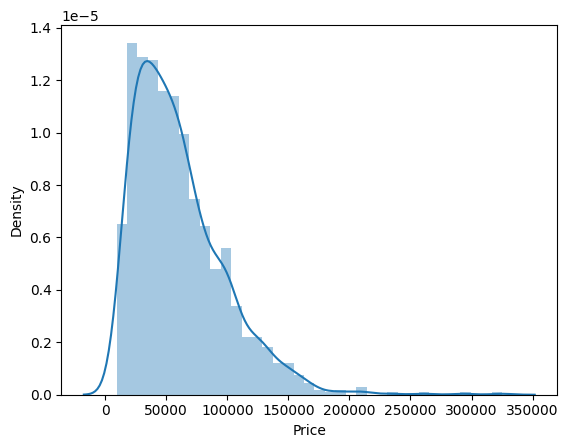

In [68]:
sns.distplot(laptop['Price'])

> **Dealing with the other categorical variables**

In [69]:
laptop.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,No,Yes,685233.082707,Intel Core i5,0,128,Intel,Other/No OS/Linux
1,Apple,Ultrabook,8,1.34,47895.5232,No,No,216812.030075,Intel Core i5,0,0,Intel,Other/No OS/Linux
2,HP,Notebook,8,1.86,30636.0000,No,No,311076.923077,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,No,Yes,748987.012987,Intel Core i7,0,512,AMD,Other/No OS/Linux
4,Apple,Ultrabook,8,1.37,96095.8080,No,Yes,685233.082707,Intel Core i5,0,256,Intel,Other/No OS/Linux


In [70]:
categorical_columns=['Company','TypeName','Ram','TouchScreen','IPS','CPU Brand','HDD','SSD','GPU Brand','OS']

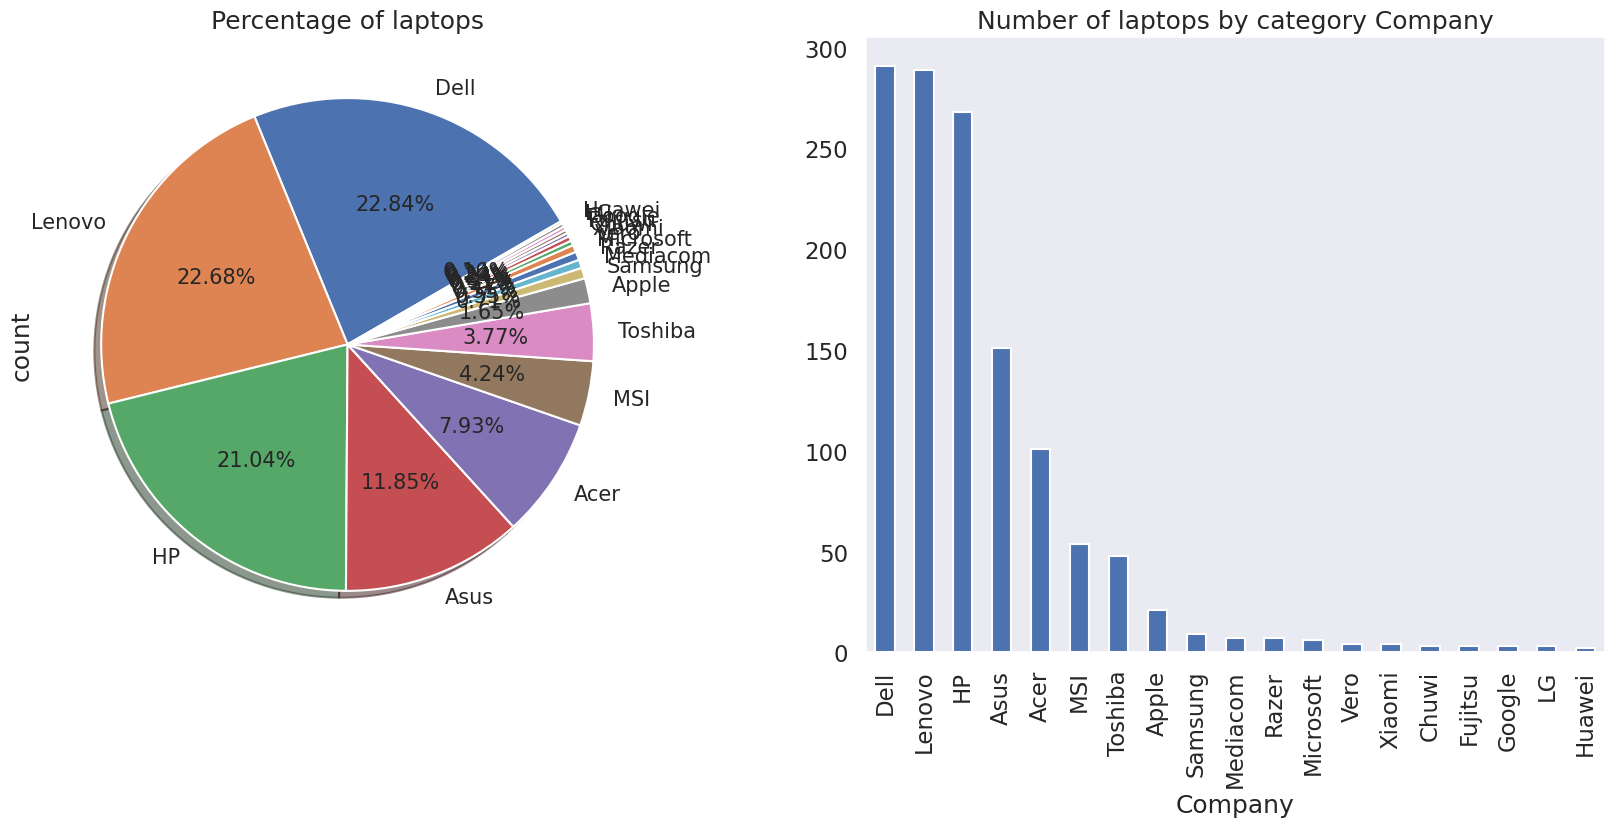

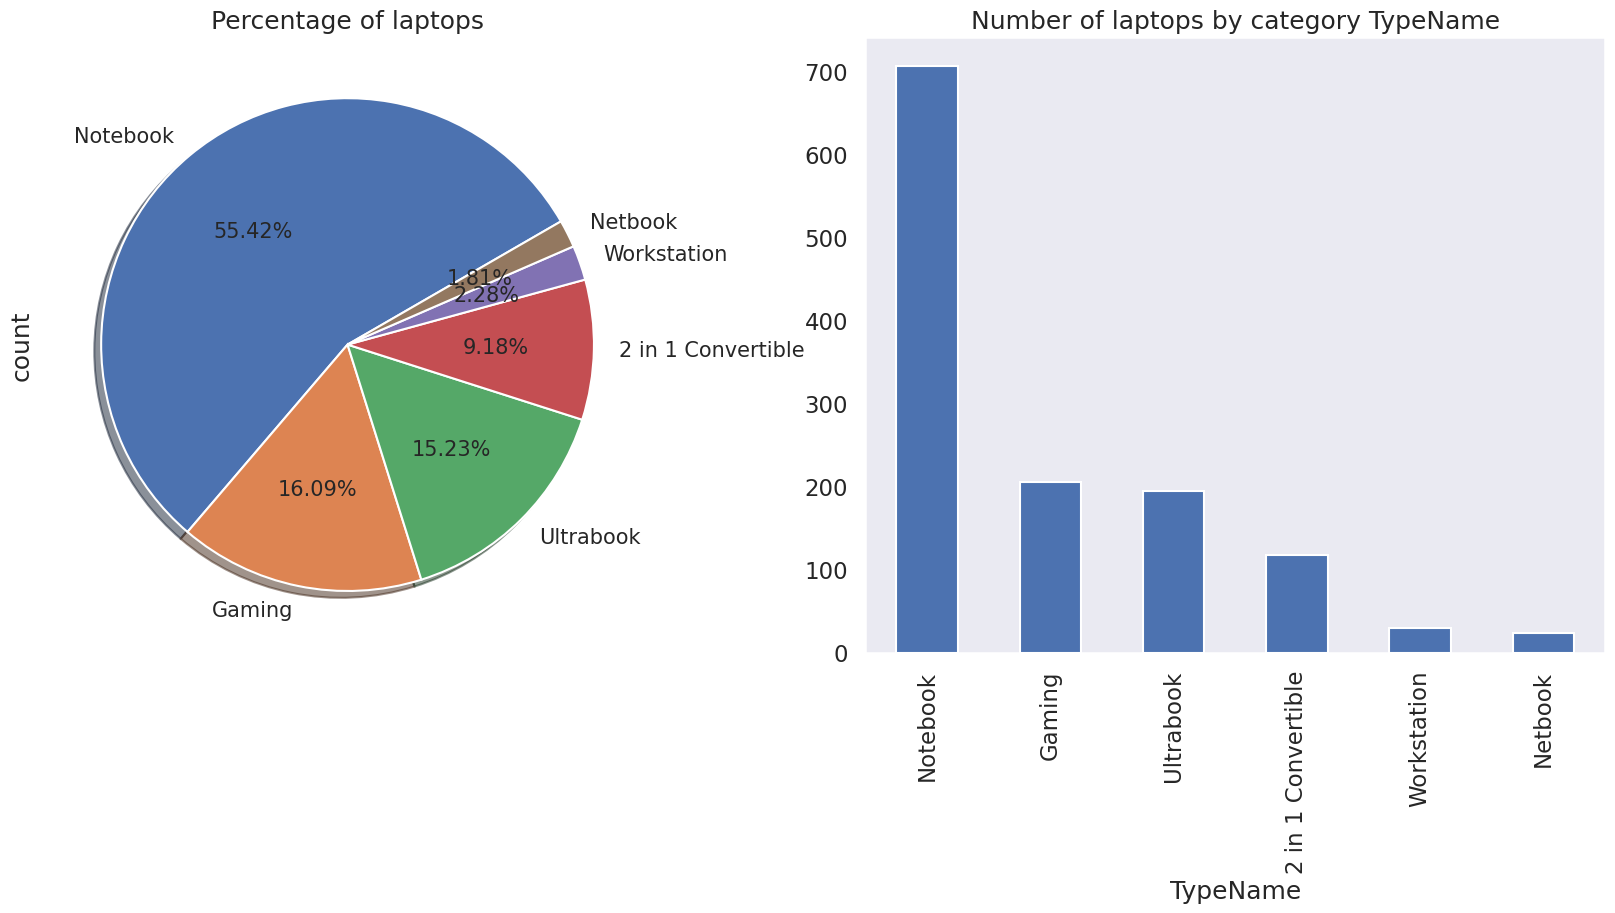

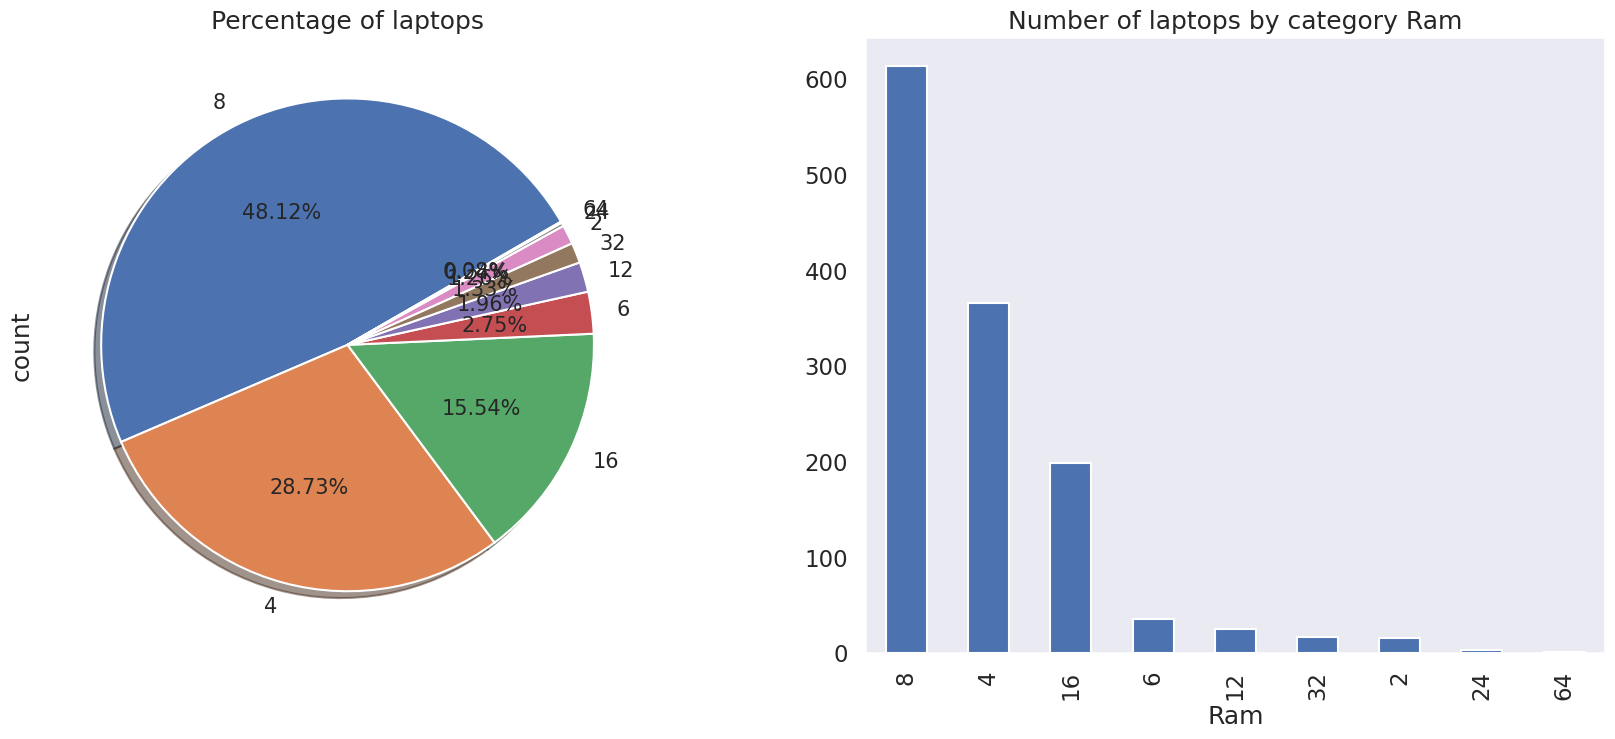

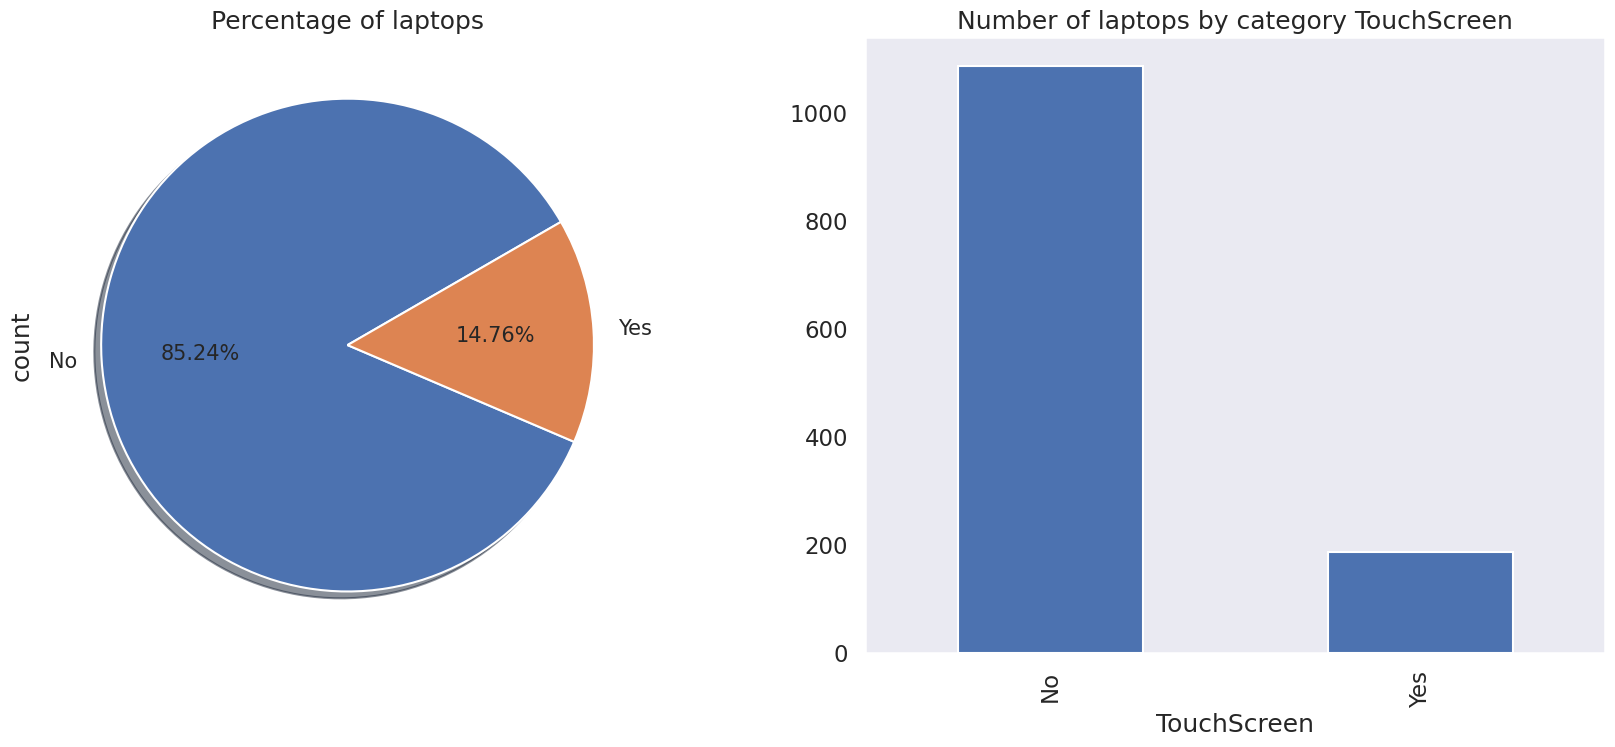

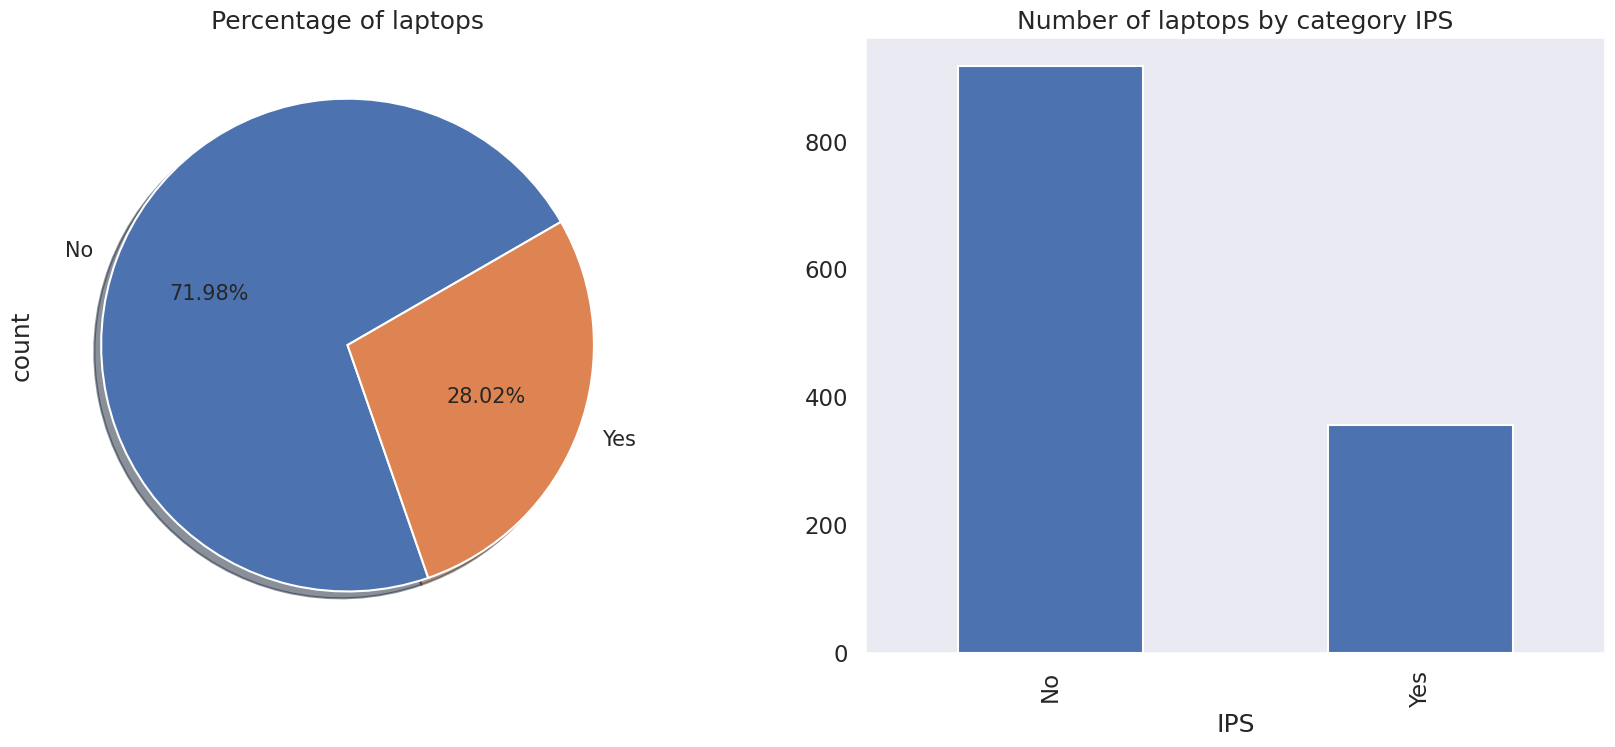

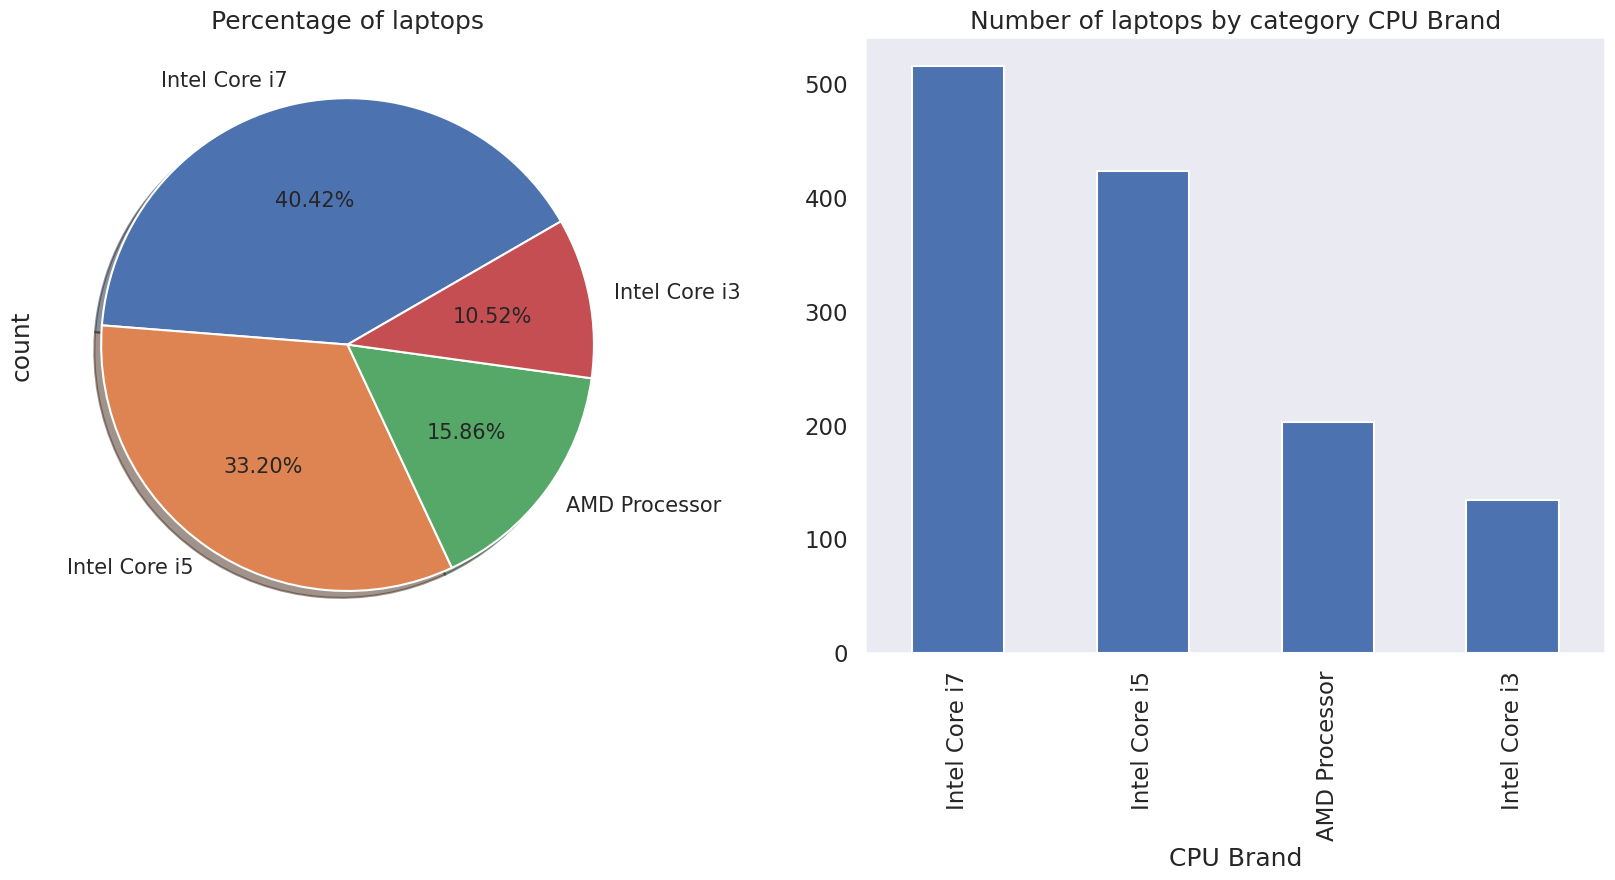

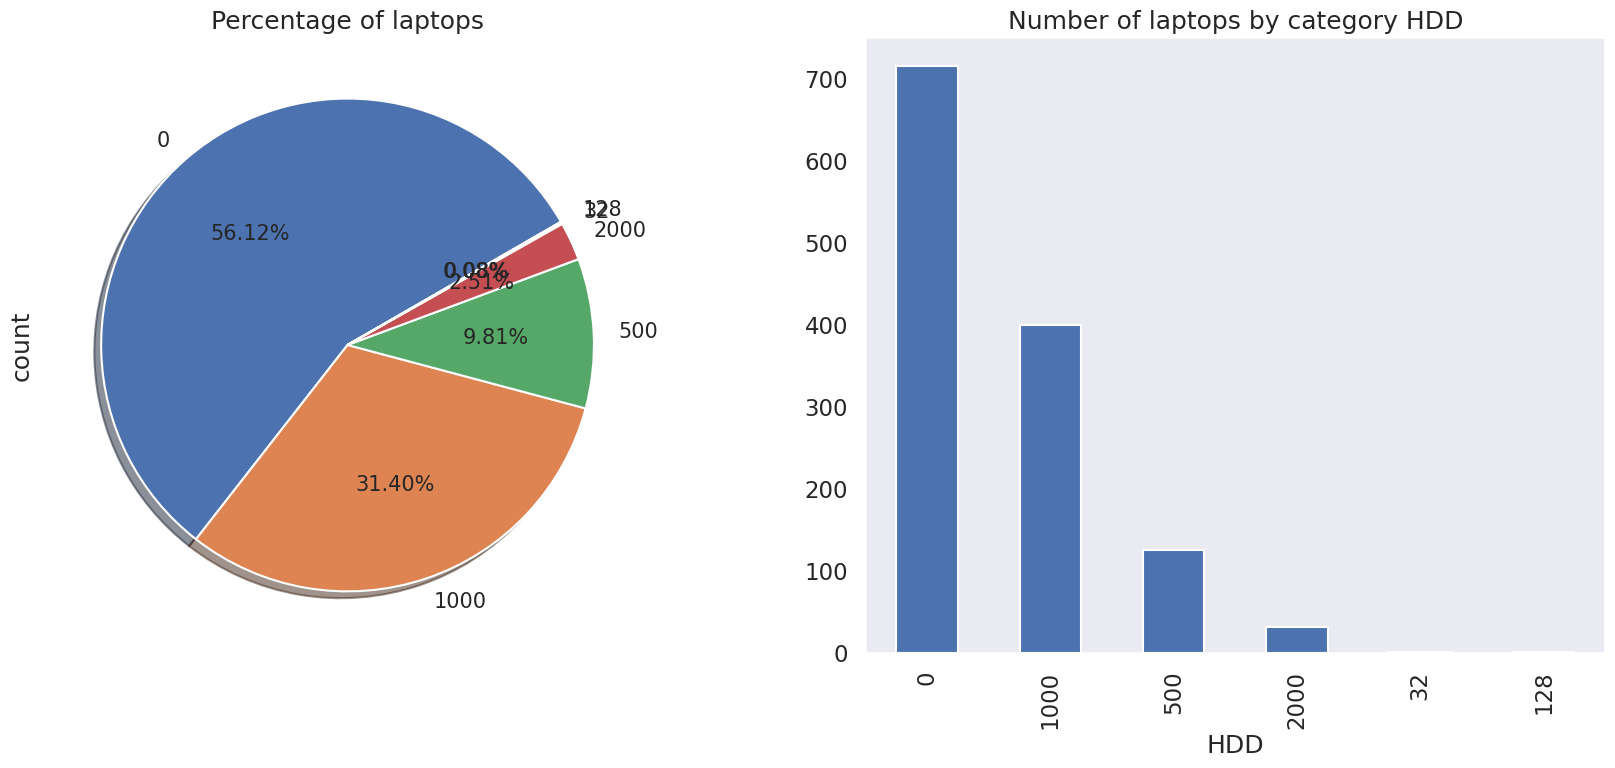

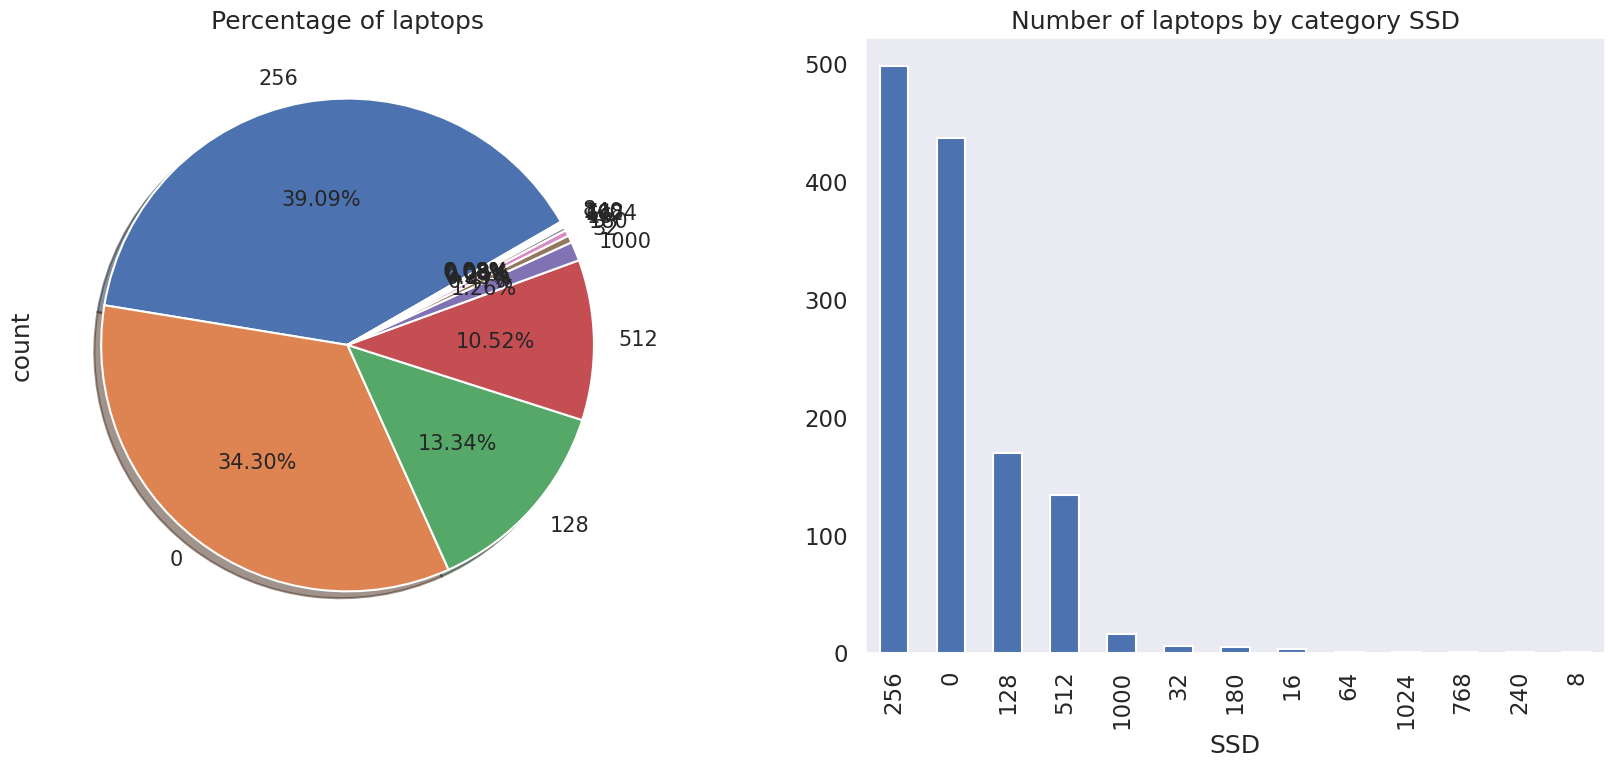

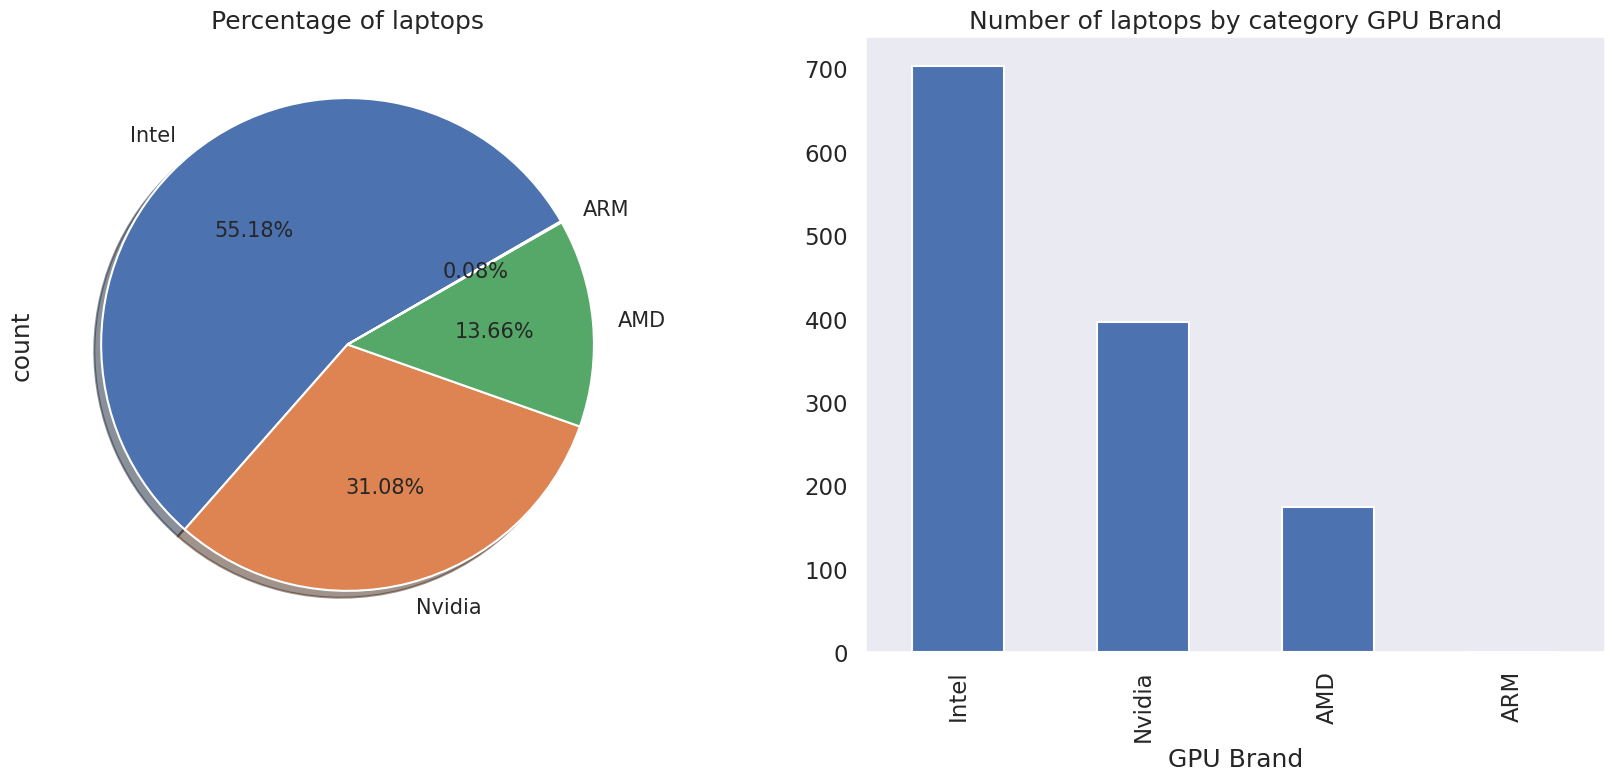

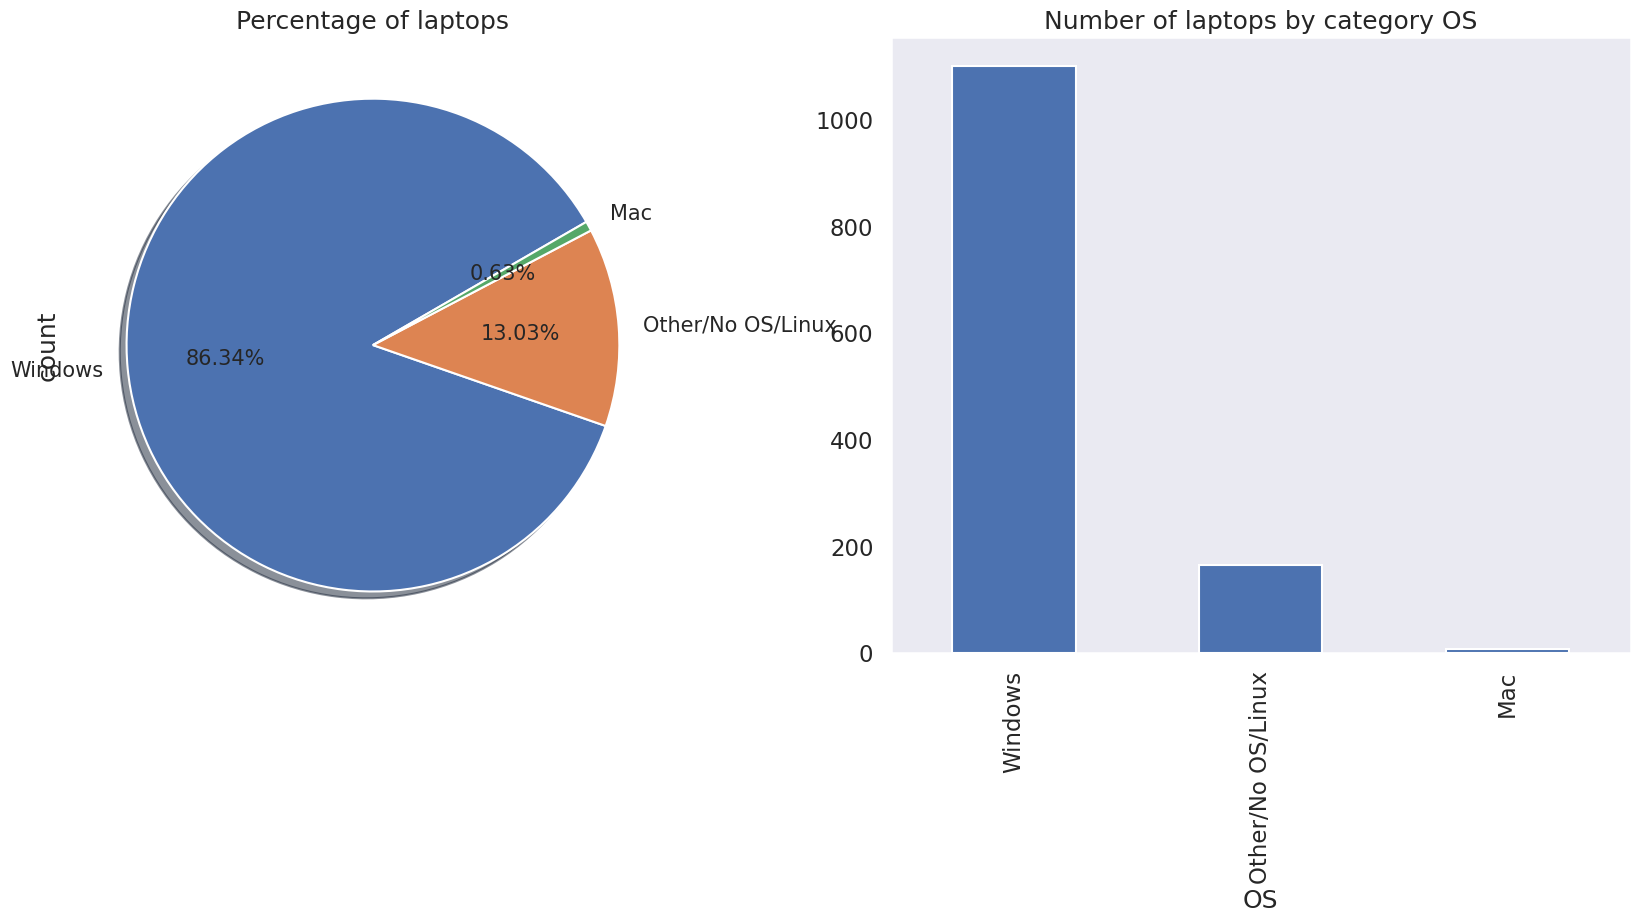

In [71]:
for i in categorical_columns:

    sns.set_theme(style="dark", context="talk")

    fig,ax=plt.subplots(1,2,figsize=(21,8))
    laptop[i].value_counts().plot.pie(ax=ax[0],autopct="%1.2f%%",shadow=True,fontsize=15,startangle=30)
    ax[0].set_title("Percentage of laptops")

    laptop[i].value_counts().plot.bar(ax=ax[1])
    ax[1].set_title("Number of laptops by category "+str(i))
    plt.show()

> **Target Variables with Predictors**

In [72]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1274 non-null   object 
 1   TypeName     1274 non-null   object 
 2   Ram          1274 non-null   int64  
 3   Weight       1274 non-null   float64
 4   Price        1274 non-null   float64
 5   TouchScreen  1274 non-null   object 
 6   IPS          1274 non-null   object 
 7   ppi          1274 non-null   float64
 8   CPU Brand    1274 non-null   object 
 9   HDD          1274 non-null   int64  
 10  SSD          1274 non-null   int64  
 11  GPU Brand    1274 non-null   object 
 12  OS           1274 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 139.3+ KB


In [73]:
factors_categorical=['Company', 'TypeName','Ram','TouchScreen', 'IPS','CPU Brand','GPU Brand', 'OS']

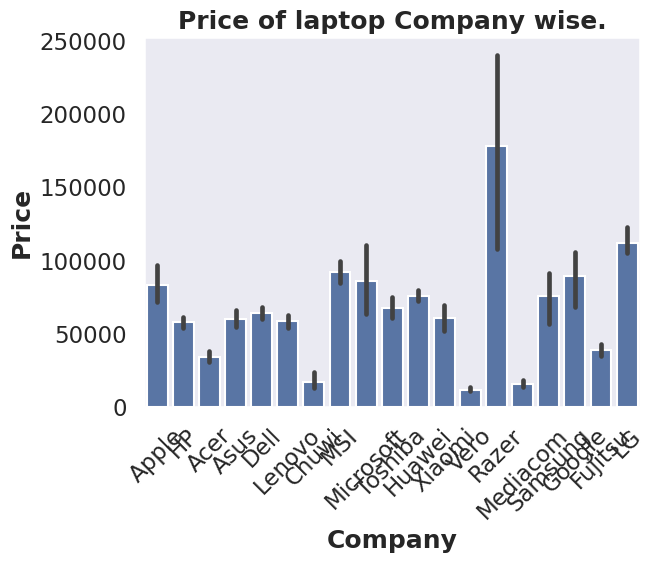

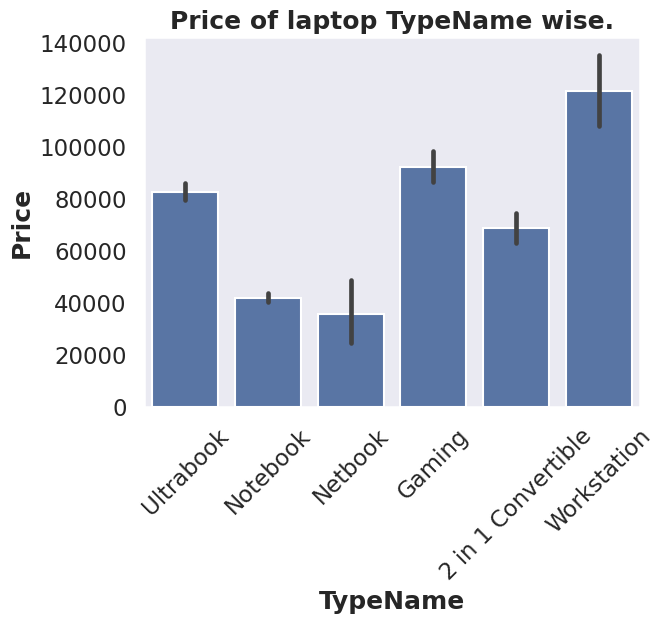

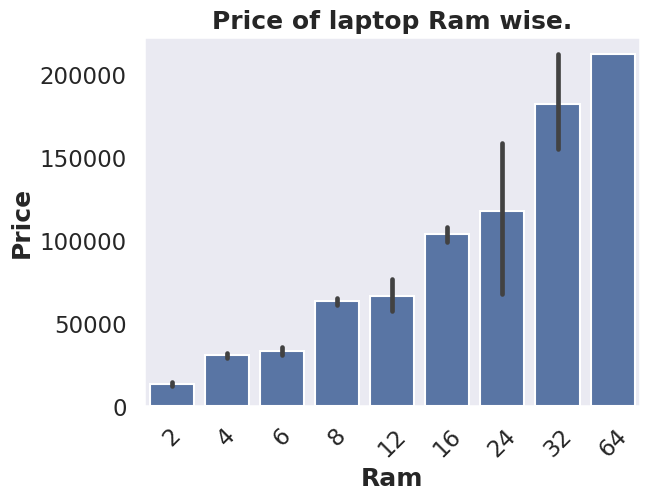

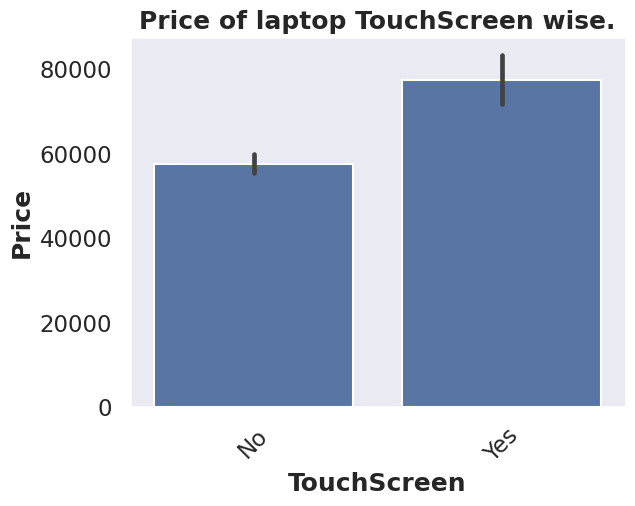

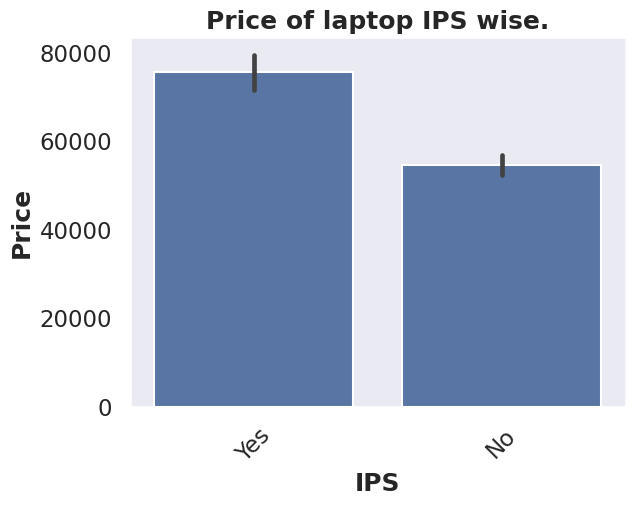

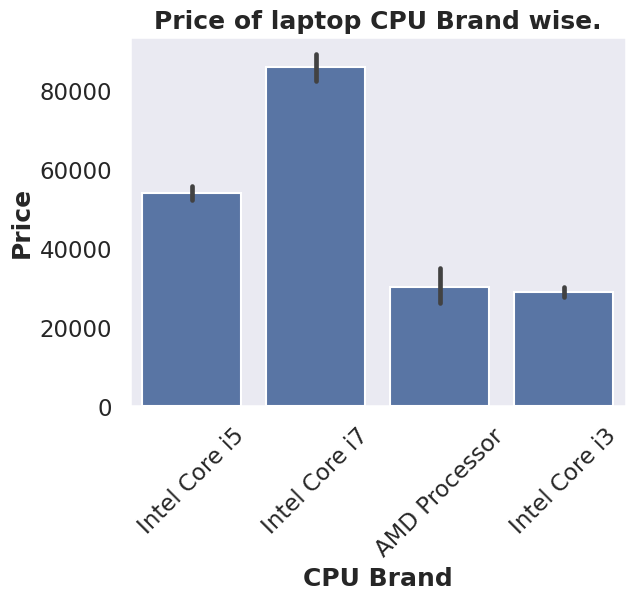

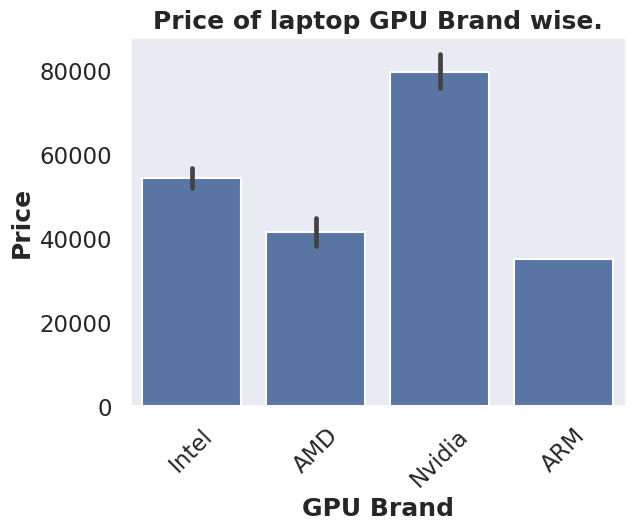

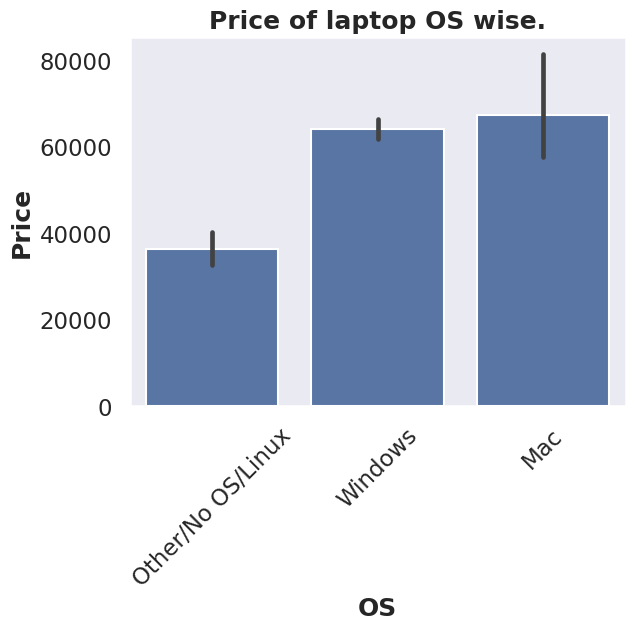

In [74]:
for i, predictor in enumerate(laptop[factors_categorical]):
  plt.figure(i)
  plt.xlabel(predictor,fontweight='bold')
  plt.ylabel("Price",fontweight='bold')
  plt.title("Price of laptop "+str(factors_categorical[i])+" wise.",fontweight='bold')
  sns.barplot(x=laptop[predictor],y=laptop['Price'],edgecolor = 'w')
  plt.xticks(rotation=45)

In [75]:
factors_numerical=['Weight','ppi','HDD','SSD']

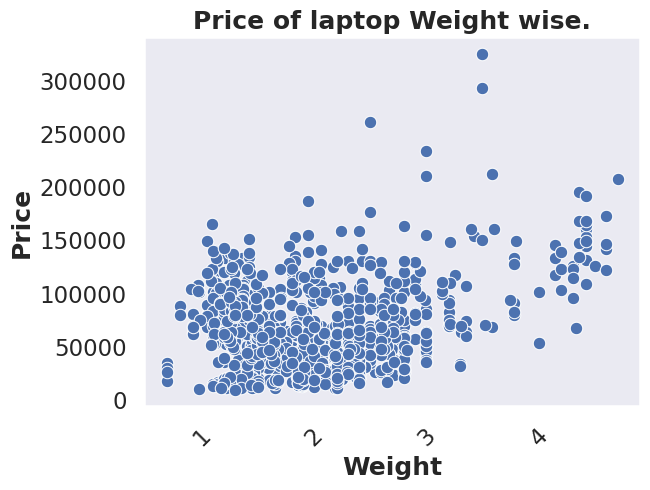

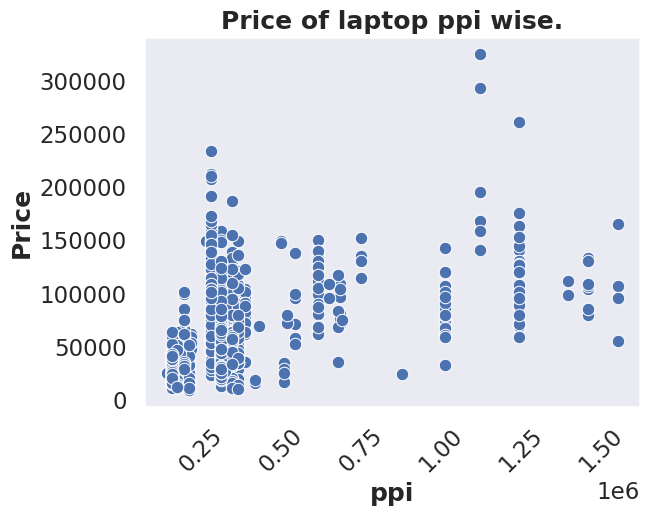

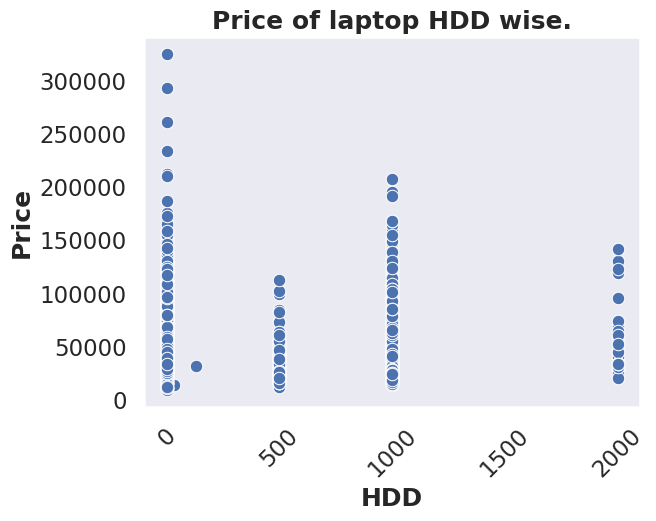

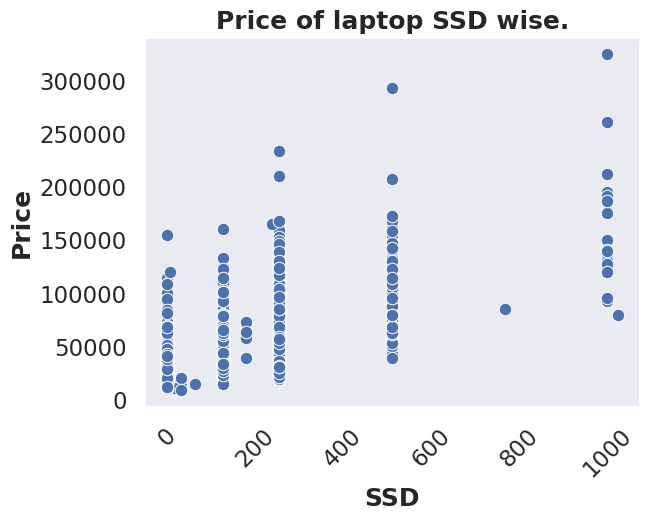

In [76]:
for i, predictor in enumerate(laptop[factors_numerical]):
  plt.figure(i)
  plt.xlabel(predictor,fontweight='bold')
  plt.ylabel("Price",fontweight='bold')
  plt.title("Price of laptop "+str(factors_numerical[i])+" wise.",fontweight='bold')
  sns.scatterplot(x=laptop[predictor],y=laptop['Price'])
  plt.xticks(rotation=45)

## **Step 5. Feature Engineering**

> **Dealing with Binary Variables**

In [77]:
laptop.nunique()==2

,0
Company,False
TypeName,False
Ram,False
Weight,False
Price,False
TouchScreen,True
IPS,True
ppi,False
CPU Brand,False
HDD,False


In [78]:
laptop['TouchScreen'].value_counts()

,count
TouchScreen,
No,1086
Yes,188


In [79]:
laptop['IPS'].value_counts()

,count
IPS,
No,917
Yes,357


In [80]:
laptop['TouchScreen']=laptop['TouchScreen'].map({'Yes':1,'No':0})
laptop['IPS']=laptop['IPS'].map({'Yes':1,'No':0})

> **Dealing with multivariate Variables**

In [81]:
laptop.nunique()

,0
Company,19
TypeName,6
Ram,9
Weight,171
Price,791
TouchScreen,2
IPS,2
ppi,39
CPU Brand,4
HDD,6


In [82]:
multivariate_columns=['Company','TypeName','CPU Brand','GPU Brand','OS']

In [83]:
for i in multivariate_columns:
  dummies=pd.get_dummies(laptop[i],prefix=i,drop_first=True)
  laptop=pd.concat([laptop,dummies],axis=1)

In [84]:
laptop.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,...,TypeName_Ultrabook,TypeName_Workstation,CPU Brand_Intel Core i3,CPU Brand_Intel Core i5,CPU Brand_Intel Core i7,GPU Brand_ARM,GPU Brand_Intel,GPU Brand_Nvidia,OS_Other/No OS/Linux,OS_Windows
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,685233.082707,Intel Core i5,0,...,True,False,False,True,False,False,True,False,True,False
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,216812.030075,Intel Core i5,0,...,True,False,False,True,False,False,True,False,True,False
2,HP,Notebook,8,1.86,30636.0000,0,0,311076.923077,Intel Core i5,0,...,False,False,False,True,False,False,True,False,True,False
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,748987.012987,Intel Core i7,0,...,True,False,False,False,True,False,False,False,True,False
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,685233.082707,Intel Core i5,0,...,True,False,False,True,False,False,True,False,True,False


In [85]:
laptop.drop(multivariate_columns,axis=1,inplace=True)

In [86]:
laptop.head()

,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,CPU Brand_Intel Core i3,CPU Brand_Intel Core i5,CPU Brand_Intel Core i7,GPU Brand_ARM,GPU Brand_Intel,GPU Brand_Nvidia,OS_Other/No OS/Linux,OS_Windows
0,8,1.37,71378.6832,0,1,685233.082707,0,128,True,False,...,True,False,False,True,False,False,True,False,True,False
1,8,1.34,47895.5232,0,0,216812.030075,0,0,True,False,...,True,False,False,True,False,False,True,False,True,False
2,8,1.86,30636.0000,0,0,311076.923077,0,256,False,False,...,False,False,False,True,False,False,True,False,True,False
3,16,1.83,135195.3360,0,1,748987.012987,0,512,True,False,...,True,False,False,False,True,False,False,False,True,False
4,8,1.37,96095.8080,0,1,685233.082707,0,256,True,False,...,True,False,False,True,False,False,True,False,True,False


In [87]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ram                      1274 non-null   int64  
 1   Weight                   1274 non-null   float64
 2   Price                    1274 non-null   float64
 3   TouchScreen              1274 non-null   int64  
 4   IPS                      1274 non-null   int64  
 5   ppi                      1274 non-null   float64
 6   HDD                      1274 non-null   int64  
 7   SSD                      1274 non-null   int64  
 8   Company_Apple            1274 non-null   bool   
 9   Company_Asus             1274 non-null   bool   
 10  Company_Chuwi            1274 non-null   bool   
 11  Company_Dell             1274 non-null   bool   
 12  Company_Fujitsu          1274 non-null   bool   
 13  Company_Google           1274 non-null   bool   
 14  Company_HP               1274

In [88]:
laptop = laptop.astype({col: int for col in laptop.select_dtypes(include=['bool']).columns})
laptop.head()

,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,CPU Brand_Intel Core i3,CPU Brand_Intel Core i5,CPU Brand_Intel Core i7,GPU Brand_ARM,GPU Brand_Intel,GPU Brand_Nvidia,OS_Other/No OS/Linux,OS_Windows
0,8,1.37,71378.6832,0,1,685233.082707,0,128,1,0,...,1,0,0,1,0,0,1,0,1,0
1,8,1.34,47895.5232,0,0,216812.030075,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
2,8,1.86,30636.0000,0,0,311076.923077,0,256,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,135195.3360,0,1,748987.012987,0,512,1,0,...,1,0,0,0,1,0,0,0,1,0
4,8,1.37,96095.8080,0,1,685233.082707,0,256,1,0,...,1,0,0,1,0,0,1,0,1,0


In [89]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ram                      1274 non-null   int64  
 1   Weight                   1274 non-null   float64
 2   Price                    1274 non-null   float64
 3   TouchScreen              1274 non-null   int64  
 4   IPS                      1274 non-null   int64  
 5   ppi                      1274 non-null   float64
 6   HDD                      1274 non-null   int64  
 7   SSD                      1274 non-null   int64  
 8   Company_Apple            1274 non-null   int64  
 9   Company_Asus             1274 non-null   int64  
 10  Company_Chuwi            1274 non-null   int64  
 11  Company_Dell             1274 non-null   int64  
 12  Company_Fujitsu          1274 non-null   int64  
 13  Company_Google           1274 non-null   int64  
 14  Company_HP               1274

In [90]:
# Show all object (string/categorical) columns
object_cols = laptop.select_dtypes(include=['object'])
print("Object type columns:")
print(object_cols.columns)


Object type columns:
Index([], dtype='object')


In [91]:
#laptop[['HDD','SSD','Hybrid','Flash_Storage']]
laptop['HDD'].unique()

array([   0,  500, 1000, 2000,   32,  128])

In [92]:
laptop["SSD"].unique()

array([ 128,    0,  256,  512,   32,   64, 1000, 1024,   16,  768,  180,
        240,    8])

## **Step 5. Model Building**

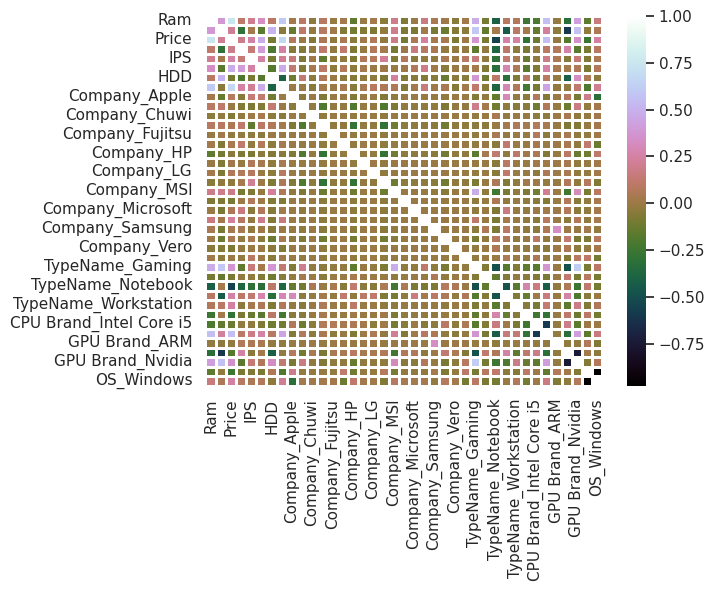

In [93]:
numeric_data = laptop.select_dtypes(include=['number'])
sns.set(font_scale=1)
plot=sns.heatmap(laptop.corr(),cmap="cubehelix",linewidths=1,square=False)

/tmp/ipython-input-4032248244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Price'])


<Axes: xlabel='Price', ylabel='Density'>

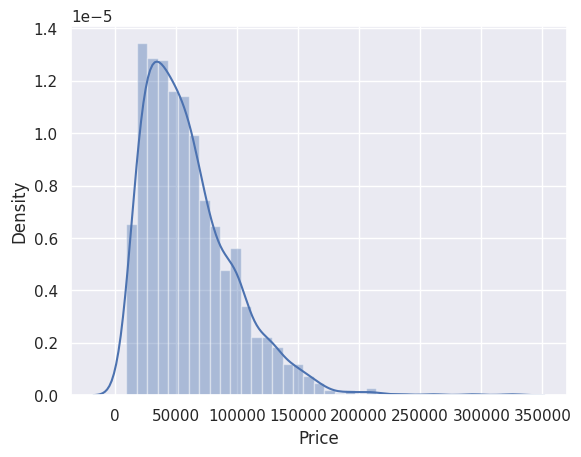

In [94]:
sns.distplot(laptop['Price'])

/tmp/ipython-input-3984844542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(laptop['Price']))


<Axes: xlabel='Price', ylabel='Density'>

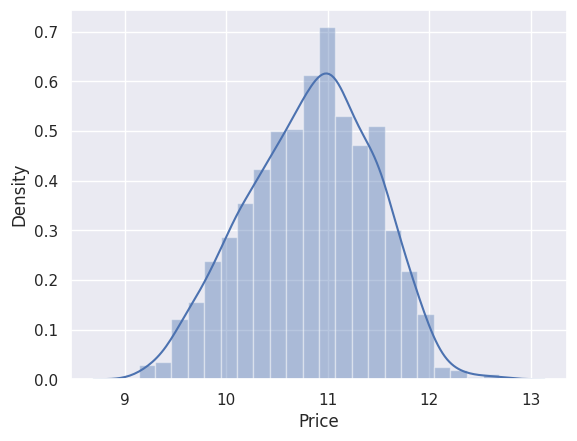

In [95]:
sns.distplot(np.log(laptop['Price']))

In [96]:
x=laptop.drop(['Price'],axis=1)
y=np.log(laptop.Price)

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15,random_state=6)

In [98]:
from sklearn.metrics import r2_score,mean_absolute_error,confusion_matrix,accuracy_score

> **Linear Regression**

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [100]:
linear=LinearRegression().fit(x_train,y_train)

In [101]:
linear_pred=linear.predict(x_test)

In [102]:
print('R2 Score : ',r2_score(y_test,linear_pred))
print('MAE : ',mean_absolute_error(y_test,linear_pred))

R2 Score :  0.819280879867146
MAE :  0.20641559618757563


> **Ridge Regression**

In [103]:
from sklearn.linear_model import Ridge

In [104]:
ridge=Ridge(alpha=10)

In [105]:
ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [106]:
ridge_pred=ridge.predict(x_test)

In [107]:
print('R2 Score : ',r2_score(y_test,ridge_pred))
print('MAE : ',mean_absolute_error(y_test,ridge_pred))

R2 Score :  0.82040236587567
MAE :  0.20964162045857596


> **Lasso Regression**

In [108]:
from sklearn.linear_model import Lasso

In [109]:
lasso=Lasso()

In [110]:
lasso.fit(x_train,y_train)

Lasso()

In [111]:
lasso_pred=lasso.predict(x_test)

In [112]:
print('R2 Score : ',r2_score(y_test,lasso_pred))
print('MAE : ',mean_absolute_error(y_test,lasso_pred))

R2 Score :  0.5452685330436841
MAE :  0.3444294319009213


> **KNN Regressor**

In [113]:
from sklearn.neighbors import KNeighborsRegressor

In [114]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [115]:
knn_pred=knn.predict(x_test)

In [116]:
print('R2_Score : ',r2_score(y_test,knn_pred))
print('MAE : ',mean_absolute_error(y_test,knn_pred))

R2_Score :  0.7957655699238676
MAE :  0.2047519606209971


> **DecisionTree Regressor**

In [117]:
from sklearn.tree import DecisionTreeRegressor

In [118]:
tree=DecisionTreeRegressor(max_depth=8)

In [119]:
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [120]:
tree_pred=tree.predict(x_test)

In [121]:
print('R2_Score : ',r2_score(y_test,tree_pred))
print('MAE : ',mean_absolute_error(y_test,tree_pred))

R2_Score :  0.8341020410972406
MAE :  0.18903164316341234


> **Random Forest Regressor**

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
forest=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

In [124]:
forest.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)

In [125]:
forest_pred=forest.predict(x_test)

In [126]:
print('R2_Score : ',r2_score(y_test,forest_pred))
print('MAE : ',mean_absolute_error(y_test,forest_pred))

R2_Score :  0.88609951421817
MAE :  0.16242087300419905


> **SVM**

In [127]:
from sklearn.svm import SVR

In [128]:
sup_vec=SVR(kernel='rbf',C=10000,epsilon=0.1)

In [129]:
sup_vec.fit(x_train,y_train)

SVR(C=10000)

In [130]:
sup_vec_pred=sup_vec.predict(x_test)

In [131]:
print('R2_Score : ',r2_score(y_test,sup_vec_pred))
print('MAE : ',mean_absolute_error(y_test,sup_vec_pred))

R2_Score :  0.5763915678032938
MAE :  0.32261283503800603


## **Conclusion**

After trying on the various model, we observe that the RandomForest Regressor model has the highest accuracy with Score of 88.60 %.